# Model 1

This model is designed to be extremely basic, without any specific parameters chosen or adjusted for hyperparameters. In essence, almost every hyperparameter can be considered as default. The only parameter that has been set is the number of epochs, which has been increased to 20 (as opposed to the standard 10).
This was done to determine the model's limitations and at what point it begins to overfit the data. By keeping the model simple, we can identify the most critical factors that influence the accuracy of the predictions. Additionally, this approach enables us to avoid overcomplicating the model, which can lead to unnecessary complexity and make it challenging to interpret the results. Especially since the goal as to create more complexe models based on this one.

In [2]:
#load the data
import csv
import numpy as np

data = np.load('final_dataset/labels.npz')
# Extract the onehot encoded labels
labels1 = data['labels1']
labels2 = data['labels2']
labels3 = data['labels3']
print("labels load finished\n")

spectrograms = np.load("final_dataset/spectrograms.npy")
print("Spectrogramms load finished")


labels load finished

Spectrogramms load finished


In [7]:
#Data preparation for model
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf

# convert the lists to tensors

spectrograms = torch.tensor(spectrograms)
labels = torch.tensor(labels1)
classes = ["Neutral","Sadness","Happiness","Excited","Other"
           ,"Surprise","Frustration","Anger","Fear","Disgust"]

# split the data into training and validation sets
train_spectrograms, val_spectrograms, train_labels, val_labels = train_test_split(spectrograms, labels, test_size=0.25, random_state=42)

# normalize the spectrograms
train_spectrograms /= 255.0
val_spectrograms /= 255.0

# reshape the spectrograms to have a channel dimension of 1
print(len(train_spectrograms),len(val_spectrograms),labels1[5:])
print(train_spectrograms.shape)
print(val_spectrograms.shape)

# convert the lists to TensorFlow tensors
train_spectrograms = tf.convert_to_tensor(train_spectrograms, dtype=tf.float32)
val_spectrograms = tf.convert_to_tensor(val_spectrograms, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32)
val_labels = tf.convert_to_tensor(val_labels, dtype=tf.int32)

# add a channel dimension to the spectrograms
train_spectrograms = tf.expand_dims(train_spectrograms, axis=-1)
val_spectrograms = tf.expand_dims(val_spectrograms, axis=-1)

C:\Users\munzn\AppData\Local\Temp\ipykernel_37228\4087227546.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  spectrograms = torch.tensor(spectrograms)


15171 5057 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
torch.Size([15171, 128, 39])
torch.Size([5057, 128, 39])


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=train_spectrograms.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_spectrograms, train_labels, batch_size=32, epochs=10, validation_data=(val_spectrograms, val_labels))



Epoch 1/10
475/475 [==============================] - 40s 82ms/step - loss: 1.7941 - accuracy: 0.3229 - val_loss: 1.7083 - val_accuracy: 0.3512
Epoch 2/10
475/475 [==============================] - 39s 82ms/step - loss: 1.7219 - accuracy: 0.3475 - val_loss: 1.6795 - val_accuracy: 0.3439
Epoch 3/10
475/475 [==============================] - 38s 79ms/step - loss: 1.6949 - accuracy: 0.3577 - val_loss: 1.6468 - val_accuracy: 0.3607
Epoch 4/10
475/475 [==============================] - 38s 81ms/step - loss: 1.6778 - accuracy: 0.3673 - val_loss: 1.6454 - val_accuracy: 0.3714
Epoch 5/10
475/475 [==============================] - 40s 84ms/step - loss: 1.6628 - accuracy: 0.3780 - val_loss: 1.6287 - val_accuracy: 0.3846
Epoch 6/10
475/475 [==============================] - 37s 78ms/step - loss: 1.6493 - accuracy: 0.3859 - val_loss: 1.6208 - val_accuracy: 0.3842
Epoch 7/10
475/475 [==============================] - 38s 81ms/step - loss: 1.6294 - accuracy: 0.3891 - val_loss: 1.6237 - val_accuracy:

159/159 [==============================] - 3s 17ms/step


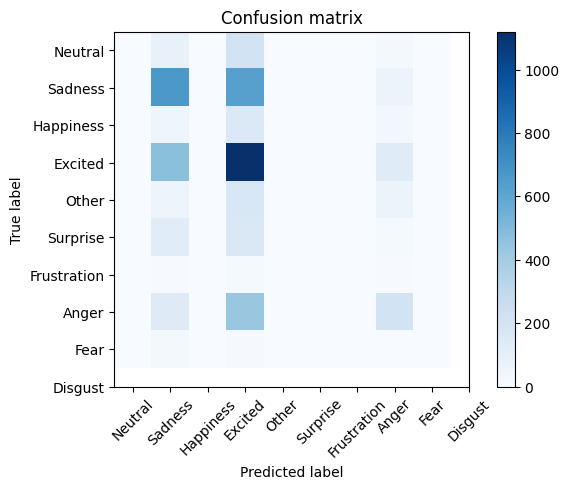

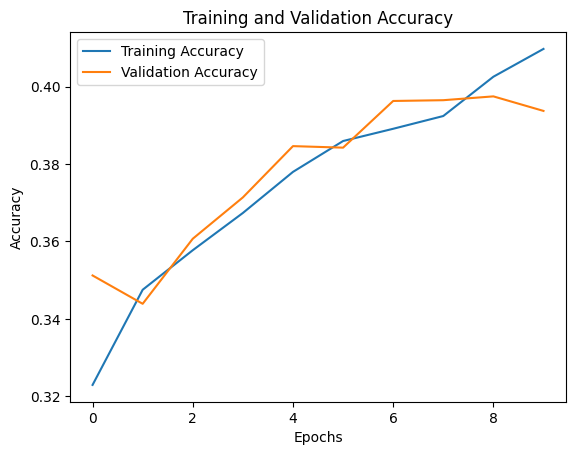

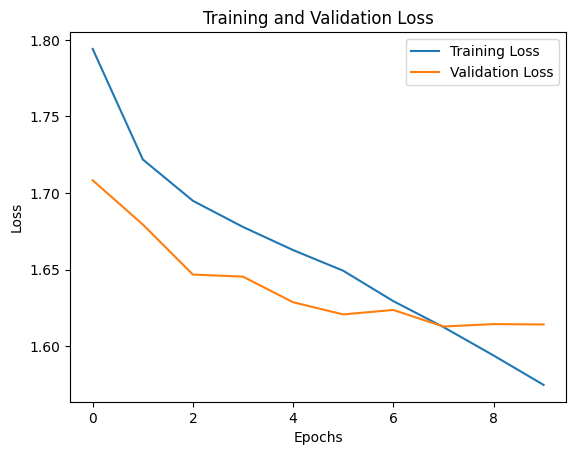

In [9]:
#results and analysis

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted labels
pred_labels = np.argmax(model.predict(val_spectrograms), axis=1)

# Convert the one-hot encoded labels to integer labels
val_labels_int = np.argmax(val_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(val_labels_int, pred_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Get the training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a line plot of the training and validation accuracy values
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Create a line plot of the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Save the model
model.save('model1.h5')

# Export the model for use in a web application
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model1.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\munzn\AppData\Local\Temp\tmpigcei7up\assets


INFO:tensorflow:Assets written to: C:\Users\munzn\AppData\Local\Temp\tmpigcei7up\assets
